In [2]:
import requests
import json
from config import api_key_census
import census
from census import Census
import pandas as pd
import matplotlib.pyplot as plt
import us
from us import states
from scipy.stats import linregress
from scipy import stats
import numpy as np

In [3]:
## Open clean data files
census_income_2017_clean= pd.read_csv('HH_Income2017_Clean_NN.csv')
census_income_2016_clean= pd.read_csv('HH_Income2016_Clean_NN.csv')
census_income_2015_clean= pd.read_csv('HH_Income2015_Clean_NN.csv')
census_income_2014_clean= pd.read_csv('HH_Income2014_Clean_NN.csv')
census_income_2013_clean= pd.read_csv('HH_Income2013_Clean_NN.csv')
census_income_2012_clean= pd.read_csv('HH_Income2012_Clean_NN.csv')
census_income_2011_clean= pd.read_csv('HH_Income2011_Clean_NN.csv')

census_income_2011_clean

,Zipcode,Median Household Income,Median Value,Cities,Houston Area Detail
0,77002.0,66776.0,220400.0,Houston,Inner Loop
1,77003.0,35258.0,112500.0,Houston,Inner Loop
2,77004.0,34079.0,209000.0,Houston,Inner Loop
3,77005.0,147026.0,689600.0,Houston,Inner Loop
4,77006.0,62821.0,329500.0,Houston,Inner Loop
...,...,...,...,...,...
125,77562.0,52139.0,91500.0,Highlands,Other Cities
126,77571.0,69004.0,119700.0,La Porte,Other Cities
127,77586.0,85746.0,192100.0,Seabrook,Other Cities
128,77587.0,37147.0,87400.0,South Houston,Other Cities


In [4]:
### Create extra Dataframe for Houston Area and other cities to plot
houston_city_group_2017=census_income_2017_clean.groupby(['Cities'])
houston_city_group_2016=census_income_2016_clean.groupby(['Cities'])
houston_city_group_2015=census_income_2015_clean.groupby(['Cities'])
houston_city_group_2014=census_income_2014_clean.groupby(['Cities'])
houston_city_group_2013=census_income_2013_clean.groupby(['Cities'])
houston_city_group_2012=census_income_2012_clean.groupby(['Cities'])
houston_city_group_2011=census_income_2011_clean.groupby(['Cities'])
#houston_city_group_2011=census_value_cost_2011_clean.groupby(['Cities'])

median_value_2017_houston_city=houston_city_group_2017['Median Value'].mean()
median_value_2016_houston_city=houston_city_group_2016['Median Value'].mean()
median_value_2015_houston_city=houston_city_group_2015['Median Value'].mean()
median_value_2014_houston_city=houston_city_group_2014['Median Value'].mean()
median_value_2013_houston_city=houston_city_group_2013['Median Value'].mean()
median_value_2012_houston_city=houston_city_group_2012['Median Value'].mean()
median_value_2011_houston_city=houston_city_group_2011['Median Value'].mean()

median_value_2017_houston_city.reset_index()
median_value_2016_houston_city.reset_index()
median_value_2015_houston_city.reset_index()
median_value_2014_houston_city.reset_index()
median_value_2013_houston_city.reset_index()
median_value_2012_houston_city.reset_index()
median_value_2011_houston_city.reset_index()
                                                      
median_value_houston_city=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(median_value_2011_houston_city,median_value_2012_houston_city,on='Cities',suffixes=("_2011", "_2012")),
                              median_value_2013_houston_city,on='Cities'),
                              median_value_2014_houston_city,on='Cities',suffixes=("_2013", "_2014")),
                              median_value_2015_houston_city,on='Cities'),
                              median_value_2016_houston_city,on='Cities',suffixes=("_2015", "_2016")),
                              median_value_2017_houston_city,on='Cities')
median_value_houston_city=median_value_houston_city.rename(columns={'Median Value':'Median Value_2017'})
median_value_houston_city.head()

,Median Value_2011,Median Value_2012,Median Value_2013,Median Value_2014,Median Value_2015,Median Value_2016,Median Value_2017
Cities,,,,,,,
Baytown,100300.0,99200.0,98050.0,97450.0,98750.0,101550.0,107850.0
Bellaire,538700.0,557500.0,608300.0,645000.0,708800.0,768800.0,802300.0
Channelview,87500.0,88300.0,86900.0,85600.0,85700.0,88000.0,91500.0
Crosby,118600.0,119300.0,121000.0,123500.0,123200.0,126300.0,135300.0
Cypress2,181450.0,181750.0,180050.0,185100.0,194900.0,210400.0,221400.0


In [5]:
### Create extra Dataframe for Houston Area and other cities to plot

median_income_2017_houston_city=houston_city_group_2017['Median Household Income'].mean()
median_income_2016_houston_city=houston_city_group_2016['Median Household Income'].mean()
median_income_2015_houston_city=houston_city_group_2015['Median Household Income'].mean()
median_income_2014_houston_city=houston_city_group_2014['Median Household Income'].mean()
median_income_2013_houston_city=houston_city_group_2013['Median Household Income'].mean()
median_income_2012_houston_city=houston_city_group_2012['Median Household Income'].mean()
median_income_2011_houston_city=houston_city_group_2011['Median Household Income'].mean()
#median_cost_2011_houston_city=houston_city_group_2011['Median monthly housing costs'].mean()

median_income_2017_houston_city.reset_index()
median_income_2016_houston_city.reset_index()
median_income_2015_houston_city.reset_index()
median_income_2014_houston_city.reset_index()
median_income_2013_houston_city.reset_index()
median_income_2012_houston_city.reset_index()
median_income_2011_houston_city.reset_index()
#median_cost_2011_houston_city.reset_index()

median_income_houston_city=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(median_income_2011_houston_city,median_income_2012_houston_city,on='Cities',suffixes=("_2011", "_2012")),
                              median_income_2013_houston_city,on='Cities'),
                              median_income_2014_houston_city,on='Cities',suffixes=("_2013", "_2014")),
                              median_income_2015_houston_city,on='Cities'),
                              median_income_2016_houston_city,on='Cities',suffixes=("_2015", "_2016")),
                              median_income_2017_houston_city,on='Cities')
median_income_houston_city=median_income_houston_city.rename(columns={'Median Household Income':'Median Household Income_2017'})
median_income_houston_city.head()


,Median Household Income_2011,Median Household Income_2012,Median Household Income_2013,Median Household Income_2014,Median Household Income_2015,Median Household Income_2016,Median Household Income_2017
Cities,,,,,,,
Baytown,49393.5,50766.5,48567.5,48718.5,50752.5,52098.5,54412.0
Bellaire,136000.0,147660.0,144821.0,154053.0,162703.0,169545.0,172205.0
Channelview,47579.0,43439.0,44786.0,45514.0,49452.0,51209.0,55761.0
Crosby,63005.0,64317.0,63236.0,62313.0,63211.0,62785.0,62606.0
Cypress2,95125.0,94450.5,92976.5,96037.5,98246.5,101004.5,103432.5


In [6]:
### Create extra Dataframe for Houston Area to plot

house_city_list=median_value_houston_city.values.tolist()

houston_area_group_2017=census_income_2017_clean.groupby(['Houston Area Detail'])
houston_area_group_2016=census_income_2016_clean.groupby(['Houston Area Detail'])
houston_area_group_2015=census_income_2015_clean.groupby(['Houston Area Detail'])
houston_area_group_2014=census_income_2014_clean.groupby(['Houston Area Detail'])
houston_area_group_2013=census_income_2013_clean.groupby(['Houston Area Detail'])
houston_area_group_2012=census_income_2012_clean.groupby(['Houston Area Detail'])
houston_area_group_2011=census_income_2011_clean.groupby(['Houston Area Detail'])
#houston_area_group_2011=census_value_cost_2011_clean.groupby(['Houston Area Detail'])

median_value_2017_houston=houston_area_group_2017['Median Value'].mean()
median_value_2016_houston=houston_area_group_2016['Median Value'].mean()
median_value_2015_houston=houston_area_group_2015['Median Value'].mean()
median_value_2014_houston=houston_area_group_2014['Median Value'].mean()
median_value_2013_houston=houston_area_group_2013['Median Value'].mean()
median_value_2012_houston=houston_area_group_2012['Median Value'].mean()
median_value_2011_houston=houston_area_group_2011['Median Value'].mean()

median_value_2017_houston=houston_area_group_2017['Median Value'].mean()
median_value_2016_houston=houston_area_group_2016['Median Value'].mean()
median_value_2015_houston=houston_area_group_2015['Median Value'].mean()
median_value_2014_houston=houston_area_group_2014['Median Value'].mean()
median_value_2013_houston=houston_area_group_2013['Median Value'].mean()
median_value_2012_houston=houston_area_group_2012['Median Value'].mean()
median_value_2011_houston=houston_area_group_2011['Median Value'].mean()

median_value_2017_houston.reset_index()
median_value_2016_houston.reset_index()
median_value_2015_houston.reset_index()
median_value_2014_houston.reset_index()
median_value_2013_houston.reset_index()
median_value_2012_houston.reset_index()
median_value_2011_houston.reset_index()

median_value_houston=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(median_value_2011_houston,median_value_2012_houston,on='Houston Area Detail',suffixes=("_2011", "_2012")),
                              median_value_2013_houston,on='Houston Area Detail'),
                              median_value_2014_houston,on='Houston Area Detail',suffixes=("_2013", "_2014")),
                              median_value_2015_houston,on='Houston Area Detail'),
                              median_value_2016_houston,on='Houston Area Detail',suffixes=("_2015", "_2016")),
                              median_value_2017_houston,on='Houston Area Detail')
median_value_houston=median_value_houston.rename(columns={'Median Value':'Median Value_2017'})

median_value_houston.loc['Total Houston Area'] = house_city_list[9]
median_value_houston_only=median_value_houston.drop('Other Cities')
houston_area_list=median_value_houston_only.values.tolist()
median_value_houston_only.head()

,Median Value_2011,Median Value_2012,Median Value_2013,Median Value_2014,Median Value_2015,Median Value_2016,Median Value_2017
Houston Area Detail,,,,,,,
Inner Loop,246928.571429,249128.571429,257766.666667,267142.857143,284000.000000,298142.857143,318614.285714
Northeast,89140.000000,87413.333333,86446.666667,84693.333333,87626.666667,89986.666667,93953.333333
Northwest,140519.047619,139733.333333,140071.428571,143328.571429,149433.333333,159238.095238,170866.666667
Southeast,113138.461538,114223.076923,113500.000000,114369.230769,115761.538462,119246.153846,123676.923077
Southwest,202833.333333,206409.523810,207761.904762,214652.380952,222509.523810,236757.142857,253085.714286


In [7]:
### Create extra Dataframe for Houston Area to plot
value_houston_innerloop_2017=census_income_2017_clean.loc[census_income_2017_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Median Value','Median Household Income']]
value_houston_northeast_2017=census_income_2017_clean.loc[census_income_2017_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Median Value','Median Household Income']]
value_houston_northwest_2017=census_income_2017_clean.loc[census_income_2017_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Median Value','Median Household Income']]
value_houston_southeast_2017=census_income_2017_clean.loc[census_income_2017_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southwest_2017=census_income_2017_clean.loc[census_income_2017_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_innerloop_2016=census_income_2016_clean.loc[census_income_2016_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northeast_2016=census_income_2016_clean.loc[census_income_2016_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northwest_2016=census_income_2016_clean.loc[census_income_2016_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southeast_2016=census_income_2016_clean.loc[census_income_2016_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southwest_2016=census_income_2016_clean.loc[census_income_2016_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_innerloop_2015=census_income_2015_clean.loc[census_income_2015_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northeast_2015=census_income_2015_clean.loc[census_income_2015_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northwest_2015=census_income_2015_clean.loc[census_income_2015_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southeast_2015=census_income_2015_clean.loc[census_income_2015_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southwest_2015=census_income_2015_clean.loc[census_income_2015_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_innerloop_2014=census_income_2014_clean.loc[census_income_2014_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northeast_2014=census_income_2014_clean.loc[census_income_2014_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northwest_2014=census_income_2014_clean.loc[census_income_2014_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southeast_2014=census_income_2014_clean.loc[census_income_2014_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southwest_2014=census_income_2014_clean.loc[census_income_2014_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_innerloop_2013=census_income_2013_clean.loc[census_income_2013_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northeast_2013=census_income_2013_clean.loc[census_income_2013_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northwest_2013=census_income_2013_clean.loc[census_income_2013_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southeast_2013=census_income_2013_clean.loc[census_income_2013_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southwest_2013=census_income_2013_clean.loc[census_income_2013_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_innerloop_2012=census_income_2012_clean.loc[census_income_2012_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northeast_2012=census_income_2012_clean.loc[census_income_2012_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northwest_2012=census_income_2012_clean.loc[census_income_2012_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southeast_2012=census_income_2012_clean.loc[census_income_2012_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southwest_2012=census_income_2012_clean.loc[census_income_2012_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_innerloop_2011=census_income_2011_clean.loc[census_income_2011_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northeast_2011=census_income_2011_clean.loc[census_income_2011_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_northwest_2011=census_income_2011_clean.loc[census_income_2011_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southeast_2011=census_income_2011_clean.loc[census_income_2011_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southwest_2011=census_income_2011_clean.loc[census_income_2011_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Median Value', 'Median Household Income']]
value_houston_southwest_2011

,Zipcode,Median Value,Median Household Income
21,77024.0,600300.0,106052.0
28,77031.0,121400.0,42966.0
32,77035.0,142300.0,39059.0
33,77036.0,116400.0,28450.0
39,77042.0,199700.0,48438.0
42,77045.0,89300.0,40512.0
51,77056.0,546800.0,89197.0
52,77057.0,229200.0,56080.0
58,77063.0,191100.0,46074.0
66,77071.0,124300.0,44867.0


In [8]:
### Create extra Dataframe for Houston Area to plot

house_city_income_list=median_income_houston_city.values.tolist()

median_income_2017_houston=houston_area_group_2017['Median Household Income'].mean()
median_income_2016_houston=houston_area_group_2016['Median Household Income'].mean()
median_income_2015_houston=houston_area_group_2015['Median Household Income'].mean()
median_income_2014_houston=houston_area_group_2014['Median Household Income'].mean()
median_income_2013_houston=houston_area_group_2013['Median Household Income'].mean()
median_income_2012_houston=houston_area_group_2012['Median Household Income'].mean()
median_income_2011_houston=houston_area_group_2011['Median Household Income'].mean()

median_income_2017_houston.reset_index()
median_income_2016_houston.reset_index()
median_income_2015_houston.reset_index()
median_income_2014_houston.reset_index()
median_income_2013_houston.reset_index()
median_income_2012_houston.reset_index()
median_income_2011_houston.reset_index()

median_income_houston=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(median_income_2011_houston,median_income_2012_houston,on='Houston Area Detail',suffixes=("_2011", "_2012")),
                              median_income_2013_houston,on='Houston Area Detail'),
                              median_income_2014_houston,on='Houston Area Detail',suffixes=("_2013", "_2014")),
                              median_income_2015_houston,on='Houston Area Detail'),
                              median_income_2016_houston,on='Houston Area Detail',suffixes=("_2015", "_2016")),
                              median_income_2017_houston,on='Houston Area Detail')
median_income_houston=median_income_houston.rename(columns={'Median Household Income':'Median Household Income_2017'})

median_income_houston.loc['Total Houston Area'] = house_city_income_list[9]
median_income_houston_only=median_income_houston.drop('Other Cities')
houston_income_list=median_income_houston_only.values.tolist()
median_income_houston_only

,Median Household Income_2011,Median Household Income_2012,Median Household Income_2013,Median Household Income_2014,Median Household Income_2015,Median Household Income_2016,Median Household Income_2017
Houston Area Detail,,,,,,,
Inner Loop,58152.809524,58897.809524,60698.952381,63679.761905,64450.714286,66414.619048,70667.476190
Northeast,39045.666667,38720.400000,38371.200000,39024.000000,39544.733333,39636.333333,41908.533333
Northwest,54090.142857,53772.190476,53461.904762,54273.285714,54775.095238,56318.190476,57851.666667
Southeast,50751.923077,51556.384615,51127.230769,51255.769231,51123.846154,52543.230769,54286.076923
Southwest,57640.523810,57445.428571,56872.761905,57708.428571,58798.476190,59481.190476,61399.857143
Total Houston Area,52371.712766,52475.606383,52549.670213,53710.382979,54250.361702,55401.106383,57754.500000


<Figure size 432x288 with 0 Axes>

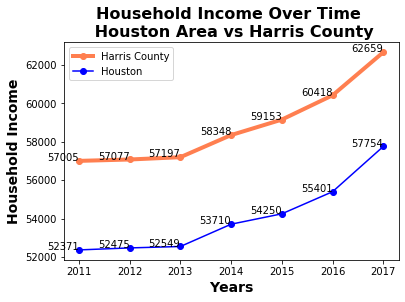

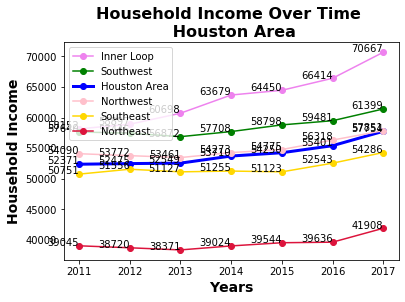

In [9]:
## Line graph for income change over time
plt.figure(5)
median_income_2017=census_income_2017_clean['Median Household Income'].mean()
median_income_2016=census_income_2016_clean['Median Household Income'].mean()
median_income_2015=census_income_2015_clean['Median Household Income'].mean()
median_income_2014=census_income_2014_clean['Median Household Income'].mean()
median_income_2013=census_income_2013_clean['Median Household Income'].mean()
median_income_2012=census_income_2012_clean['Median Household Income'].mean()
median_income_2011=census_income_2011_clean['Median Household Income'].mean()

# median_cost_2011=census_value_cost_2011_clean['Median monthly housing costs'].mean()

fig = plt.figure()
ax = fig.add_subplot(111)
median_income_list = [median_income_2011,median_income_2012,median_income_2013,median_income_2014,median_income_2015,median_income_2016,median_income_2017]
year_list=['2011','2012','2013','2014','2015','2016','2017']

plt.plot(range(len(year_list)), median_income_list, marker='o', label="Harris County",color="coral",linewidth=4) # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(median_income_list):
    ax.text(i, v, "%d" %v, ha="right")

plt.plot(range(len(year_list)), houston_income_list[5], marker='o',label="Houston",color="blue") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_income_list[5]):
    ax.text(i, v, "%d" %v, ha="right")

plt.legend(loc="best")
plt.title("Household Income Over Time \n Houston Area vs Harris County",fontsize=16, fontweight="bold")
plt.xlabel('Years',fontsize=14, fontweight="bold")
plt.ylabel('Household Income',fontsize=14, fontweight="bold")

plt.savefig('C:\workspace\Resources\Graph_Line_Income_Harris.png')

## Plot line graph income over time for Houston Area
plt.figure(6)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
year_list=['2011','2012','2013','2014','2015','2016','2017']

plt.plot(range(len(year_list)), houston_income_list[0], marker='o', label="Inner Loop",color="violet") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_income_list[0]):
    ax2.text(i, v, "%d" %v, ha="right")

plt.plot(range(len(year_list)), houston_income_list[4], marker='o', label="Southwest",color="green") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_income_list[4]):
    ax2.text(i, v, "%d" %v, ha="right")
    
plt.plot(range(len(year_list)), houston_income_list[5], marker='o',label="Houston Area",color="blue",linewidth=3) # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_income_list[5]):
    ax2.text(i, v, "%d" %v, ha="right")

plt.plot(range(len(year_list)), houston_income_list[2], marker='o', label="Northwest",color="pink") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_income_list[2]):
    ax2.text(i, v, "%d" %v, ha="right")

plt.plot(range(len(year_list)), houston_income_list[3], marker='o', label="Southeast",color="gold") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_income_list[3]):
    ax2.text(i, v, "%d" %v, ha="right")
    
plt.plot(range(len(year_list)), houston_income_list[1], marker='o', label="Northeast",color="crimson") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_income_list[1]):
    ax2.text(i, v, "%d" %v, ha="right")

plt.legend(loc="upper left")
plt.title("Household Income Over Time \n Houston Area",fontsize=16, fontweight="bold")
plt.xlabel('Years',fontsize=14, fontweight="bold")
plt.ylabel('Household Income',fontsize=14, fontweight="bold")

plt.savefig('Graph_Line_Income_Houston.png')

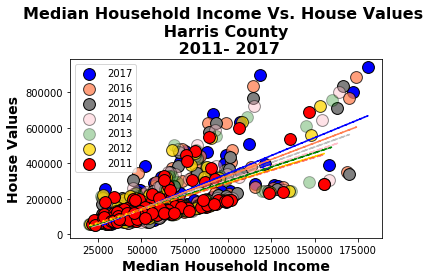

In [10]:
### Plot relationship between
## House Value vs Household income with regression lines
plt.scatter(census_income_2017_clean["Median Household Income"],
           census_income_2017_clean["Median Value"],
           edgecolor= "black", label="2017",s=140,
           c="blue")
(slope, intercept, _, _, _) = linregress(census_income_2017_clean["Median Household Income"],census_income_2017_clean["Median Value"])
fit = slope * census_income_2017_clean["Median Household Income"] + intercept
plt.plot(census_income_2017_clean["Median Household Income"], fit, 'b--',color='blue')

plt.scatter(census_income_2016_clean["Median Household Income"],
           census_income_2016_clean["Median Value"],s=140,
           edgecolor= "black",label="2016",
           c="coral", alpha=0.75)
(slope, intercept, _, _, _) = linregress(census_income_2016_clean["Median Household Income"],census_income_2016_clean["Median Value"])
fit = slope * census_income_2016_clean["Median Household Income"] + intercept
plt.plot(census_income_2016_clean["Median Household Income"], fit, 'b--',color='coral')

plt.scatter(census_income_2015_clean["Median Household Income"],
           census_income_2015_clean["Median Value"],s=140,
           edgecolor= "black",label="2015",
           c="gray", alpha=1)
(slope, intercept, _, _, _) = linregress(census_income_2015_clean["Median Household Income"],census_income_2015_clean["Median Value"])
fit = slope * census_income_2015_clean["Median Household Income"] + intercept
plt.plot(census_income_2015_clean["Median Household Income"], fit, 'b--',color='gray', alpha=0.5)

plt.scatter(census_income_2014_clean["Median Household Income"],census_income_2014_clean["Median Value"],
            edgecolor= "black",label="2014",s=140,
            c="pink", alpha=0.45)
(slope, intercept, _, _, _) = linregress(census_income_2014_clean["Median Household Income"],census_income_2014_clean["Median Value"])
fit = slope * census_income_2014_clean["Median Household Income"] + intercept
plt.plot(census_income_2014_clean["Median Household Income"], fit, 'b--',color='pink')

plt.scatter(census_income_2013_clean["Median Household Income"],
           census_income_2013_clean["Median Value"],s=140,
           edgecolor= "black",label="2013",
           c="green", alpha=0.30)
(slope, intercept, _, _, _) = linregress(census_income_2013_clean["Median Household Income"],census_income_2013_clean["Median Value"])
fit = slope * census_income_2013_clean["Median Household Income"] + intercept
plt.plot(census_income_2013_clean["Median Household Income"], fit, 'b--',color='green')

plt.scatter(census_income_2012_clean["Median Household Income"],
           census_income_2012_clean["Median Value"],
           edgecolor= "black",label="2012",s=140,
           c="gold", alpha=0.75)
(slope, intercept, _, _, _) = linregress(census_income_2012_clean["Median Household Income"],census_income_2012_clean["Median Value"])
fit = slope * census_income_2012_clean["Median Household Income"] + intercept
plt.plot(census_income_2012_clean["Median Household Income"], fit, 'b--',color='gold')

plt.scatter(census_income_2011_clean["Median Household Income"],
           census_income_2011_clean["Median Value"],
           edgecolor= "black",label="2011",s=140,
           c="red", alpha=1)
(slope, intercept, _, _, _) = linregress(census_income_2011_clean["Median Household Income"],census_income_2011_clean["Median Value"])
fit = slope * census_income_2011_clean["Median Household Income"] + intercept
plt.plot(census_income_2011_clean["Median Household Income"], fit, 'b--',color='red', alpha=0.5)

plt.title("Median Household Income Vs. House Values \n Harris County \n 2011- 2017", fontsize=16, fontweight="bold")
plt.xlabel("Median Household Income",fontsize=14, fontweight="bold")
plt.ylabel("House Values",fontsize=14, fontweight="bold")
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = [10, 8]
plt.savefig('Graph_Scatter_Income_Harris.png')
plt.show()


In [11]:
# Run T test Harris County
(t_stat2011_income, p2011_income) = stats.ttest_ind(census_income_2011_clean['Median Household Income'], census_income_2011_clean["Median Value"], equal_var=False)
(t_stat2012_income, p2012_income) = stats.ttest_ind(census_income_2012_clean['Median Household Income'], census_income_2012_clean["Median Value"], equal_var=False)
(t_stat2013_income, p2013_income) = stats.ttest_ind(census_income_2013_clean['Median Household Income'], census_income_2013_clean["Median Value"], equal_var=False)
(t_stat2014_income, p2014_income) = stats.ttest_ind(census_income_2014_clean['Median Household Income'], census_income_2014_clean["Median Value"], equal_var=False)
(t_stat2015_income, p2015_income) = stats.ttest_ind(census_income_2015_clean['Median Household Income'], census_income_2015_clean["Median Value"], equal_var=False)
(t_stat2016_income, p2016_income) = stats.ttest_ind(census_income_2016_clean['Median Household Income'], census_income_2016_clean["Median Value"], equal_var=False)
(t_stat2017_income, p2017_income) = stats.ttest_ind(census_income_2017_clean['Median Household Income'], census_income_2017_clean["Median Value"], equal_var=False)

p_value_harris_income=[p2017_income,p2016_income,p2015_income,p2014_income,p2013_income,p2012_income,p2011_income]
year_list_p_value_income=[2017,2016,2015,2014,2013,2012,2011]
p_sumary_harris_income=pd.DataFrame({'Years': year_list_p_value_income,
                 'Income P Value Harris County':p_value_harris_income})
p_sumary_harris_income

,Years,Income P Value Harris County
0,2017,2.056169e-16
1,2016,3.440431e-16
2,2015,3.856344e-16
3,2014,1.245093e-16
4,2013,1.444682e-17
5,2012,2.652522e-18
6,2011,3.857238e-19


In [12]:
# Run test on Pearson correlation coefficient Harris

r_2011_income=np.corrcoef(census_income_2011_clean['Median Household Income'], census_income_2011_clean["Median Value"])[0, 1]
r_2012_income=np.corrcoef(census_income_2012_clean['Median Household Income'], census_income_2012_clean["Median Value"])[0, 1]
r_2013_income=np.corrcoef(census_income_2013_clean['Median Household Income'], census_income_2013_clean["Median Value"])[0, 1]
r_2014_income=np.corrcoef(census_income_2014_clean['Median Household Income'], census_income_2014_clean["Median Value"])[0, 1]
r_2015_income=np.corrcoef(census_income_2015_clean['Median Household Income'], census_income_2015_clean["Median Value"])[0, 1]
r_2016_income=np.corrcoef(census_income_2016_clean['Median Household Income'], census_income_2016_clean["Median Value"])[0, 1]
r_2017_income=np.corrcoef(census_income_2017_clean['Median Household Income'], census_income_2017_clean["Median Value"])[0, 1]

year_list_r_value_income=[2017,2016,2015,2014,2013,2012,2011]

r_value_harris_income=[r_2011_income,r_2012_income,r_2013_income,r_2014_income,r_2015_income,r_2017_income,r_2017_income]

r_sumary_harris_income=pd.DataFrame({'Years': year_list_r_value_income,'Pearson Correlation Coefficient':r_value_harris_income})
r_sumary_harris_income

,Years,Pearson Correlation Coefficient
0,2017,0.701247
1,2016,0.707467
2,2015,0.721729
3,2014,0.725225
4,2013,0.731901
5,2012,0.755942
6,2011,0.755942
